<a href="https://colab.research.google.com/github/liepstik/semi_supervised_learning_MNIST/blob/master/CNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (avec Keras)

In [ ]:
#--------------------------------------

# ABIDAR Bouchra && LIEPCHITZ Laura
# MLDS-FA 2019/2020

#--------------------------------------

In [1]:
##### CNN sur touts les labels ########

## Imports 

In [2]:
import keras
from keras import layers
from keras import models
from keras.datasets import mnist 
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Construction du modèle

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu",
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
# pour passer d'un tenseur (3D) a un vecteur (1D)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
# on veut une classification a 10 classes
model.add(layers.Dense(10, activation="softmax")) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### Chargement des données MNIST


In [6]:
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

Xtrain = Xtrain.reshape((60000, 28,28,1))
Xtrain = Xtrain.astype("float32")/255

Xtest = Xtest.reshape((10000, 28,28,1))
Xtest = Xtest.astype("float32")/255

Ytrain = to_categorical(Ytrain)
Ytest = to_categorical(Ytest)

### Application du modèle

In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(Xtrain, Ytrain, epochs=50, batch_size=64, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 15s 366us/step - loss: 0.2186 - accuracy: 0.9365 - val_loss: 0.0850 - val_accuracy: 0.9736
Epoch 2/50
42000/42000 [==============================] - 15s 356us/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0522 - val_accuracy: 0.9843
Epoch 3/50
42000/42000 [==============================] - 15s 359us/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0463 - val_accuracy: 0.9861
Epoch 4/50
42000/42000 [==============================] - 15s 356us/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0577 - val_accuracy: 0.9816
Epoch 5/50
42000/42000 [==============================] - 16s 374us/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0488 - val_accuracy: 0.9867
Epoch 6/50
42000/42000 [==============================] - 16s 373us/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 7/50
42000/42000 [==============================] 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### Evaluation du modèle

In [9]:
test_loss, test_acc = model.evaluate(Xtest, Ytest)

10000/10000 [==============================] - 1s 100us/step


In [10]:
test_acc

0.9930999875068665

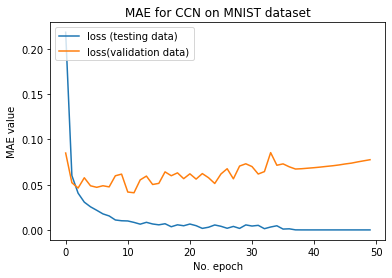

In [13]:
# Plot history: Loss
plt.plot(history.history['loss'], label='loss (testing data)')
plt.plot(history.history['val_loss'], label='loss(validation data)')
plt.title('MAE for CCN on MNIST dataset')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

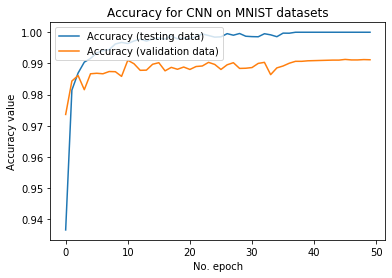

In [14]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], 
         label='Accuracy (testing data)')
plt.plot(history.history['val_accuracy'], 
         label='Accuracy (validation data)')
plt.title('Accuracy for CNN on MNIST datasets')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [15]:
##### CNN entrainer sur 100 labels ########

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.utils import shuffle

In [17]:
x, y = shuffle(Xtrain, Ytrain, random_state=15)
x_train = x[0:100]
y_train = y[0:100]

In [18]:
model_semi = Sequential()
#add   Conv2D   Activation  MaxPooling2D Dropout 
model_semi.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_semi.add(Activation('relu'))
model_semi.add(Conv2D(32, (3, 3)))
model_semi.add(Activation('relu'))
model_semi.add(MaxPooling2D(pool_size=(2, 2)))
model_semi.add(Dropout(0.25))

model_semi.add(Conv2D(64, (3, 3), padding='same'))
model_semi.add(Activation('relu'))
model_semi.add(Conv2D(64, (3, 3)))
model_semi.add(Activation('relu'))
model_semi.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model_semi.add(Flatten())
model_semi.add(Dense(512))
model_semi.add(Activation('relu'))
model_semi.add(Dropout(0.5))
model_semi.add(Dense(10))
model_semi.add(Activation('softmax'))

In [19]:
model_semi.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model_semi.fit(x_train, y_train, epochs=100, batch_size=64,  validation_data=(Xtest, Ytest))

Train on 100 samples, validate on 10000 samples
Epoch 1/100
100/100 [==============================] - 3s 31ms/step - loss: 2.3120 - accuracy: 0.1400 - val_loss: 2.2709 - val_accuracy: 0.1619
Epoch 2/100
100/100 [==============================] - 3s 29ms/step - loss: 2.2514 - accuracy: 0.2500 - val_loss: 2.2230 - val_accuracy: 0.2766
Epoch 3/100
100/100 [==============================] - 3s 29ms/step - loss: 2.1662 - accuracy: 0.2800 - val_loss: 2.1277 - val_accuracy: 0.4101
Epoch 4/100
100/100 [==============================] - 3s 29ms/step - loss: 2.0579 - accuracy: 0.3600 - val_loss: 1.9211 - val_accuracy: 0.5300
Epoch 5/100
100/100 [==============================] - 3s 29ms/step - loss: 1.8202 - accuracy: 0.4600 - val_loss: 1.6016 - val_accuracy: 0.5962
Epoch 6/100
100/100 [==============================] - 3s 28ms/step - loss: 1.5330 - accuracy: 0.5200 - val_loss: 1.2438 - val_accuracy: 0.6450
Epoch 7/100
100/100 [==============================] - 3s 29ms/step - loss: 1.2140 - acc

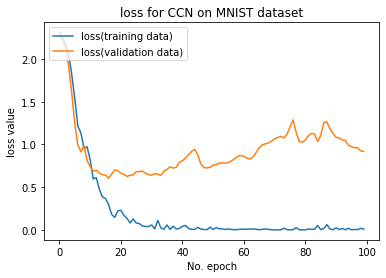

In [20]:
# Plot history: Loss
plt.plot(history.history['loss'], label='loss(training data)')
plt.plot(history.history['val_loss'], label='loss(validation data)')
plt.title('loss for CCN on MNIST dataset')
plt.ylabel('loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

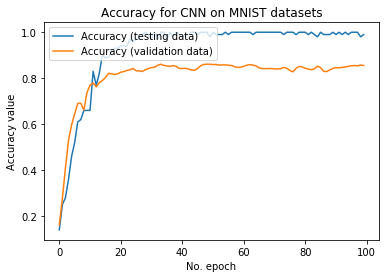

In [21]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], 
         label='Accuracy (testing data)')
plt.plot(history.history['val_accuracy'], 
         label='Accuracy (validation data)')
plt.title('Accuracy for CNN on MNIST datasets')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [22]:
test_loss, test_acc = model_semi.evaluate(Xtest, Ytest)
test_acc

10000/10000 [==============================] - 3s 312us/step


0.8553000092506409

In [31]:
## Entrainment de CNN avec 100 labels et rajouter des images (data augmentation)

In [23]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2
    )

datagen.fit(x_train)

train_generator = datagen.flow(x_train, y_train, batch_size=60, subset='training')

validation_generator = datagen.flow(x_train, y_train, batch_size=60, subset='validation')


# fits the model on batches with real-time data augmentation:
history = model_semi.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    steps_per_epoch = len(train_generator) / 60,
                    validation_steps = len(validation_generator) / 60,
                    epochs = 300,
                    workers=-1)

Epoch 1/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 82ms/step - loss: 0.4097 - accuracy: 0.9833 - val_loss: 0.0042 - val_accurac

Epoch 10/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 47ms/step - loss: 0.5885 - accuracy: 0.9500 - val_loss: 4.7425e-04 - val_ac

Epoch 19/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 100ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.1459 - val_accur

Epoch 28/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 74ms/step - loss: 0.2092 - accuracy: 0.9500 - val_loss: 0.2023 - val_accura

Epoch 37/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 126ms/step - loss: 0.1053 - accuracy: 0.9500 - val_loss: 0.1848 - val_accur

Epoch 46/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 64ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3385 - val_accura

Epoch 55/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 105ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.3921 - val_accur

Epoch 64/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 55ms/step - loss: 7.8557e-04 - accuracy: 1.0000 - val_loss: 0.2780 - val_ac

Epoch 73/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 131ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.2321 - val_accur

Epoch 82/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 50ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3406 - val_accura

Epoch 91/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 112ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3276 - val_accur

Epoch 100/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 65ms/step - loss: 2.9419e-04 - accuracy: 1.0000 - val_loss: 0.1401 - val_a

Epoch 109/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 95ms/step - loss: 0.0478 - accuracy: 0.9833 - val_loss: 0.0902 - val_accur

Epoch 118/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 48ms/step - loss: 7.8854e-04 - accuracy: 1.0000 - val_loss: 0.4125 - val_a

Epoch 127/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 91ms/step - loss: 2.3356e-04 - accuracy: 1.0000 - val_loss: 0.4562 - val_a

Epoch 136/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 44ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4663 - val_accur

Epoch 145/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 89ms/step - loss: 1.1011e-04 - accuracy: 1.0000 - val_loss: 0.4215 - val_a

Epoch 154/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 44ms/step - loss: 1.9334e-04 - accuracy: 1.0000 - val_loss: 0.6489 - val_a

Epoch 163/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 91ms/step - loss: 0.0280 - accuracy: 0.9833 - val_loss: 0.4317 - val_accur

Epoch 172/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 49ms/step - loss: 1.4370e-04 - accuracy: 1.0000 - val_loss: 0.1045 - val_a

Epoch 181/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 93ms/step - loss: 1.0582e-04 - accuracy: 1.0000 - val_loss: 0.2667 - val_a

Epoch 190/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 59ms/step - loss: 1.9350e-04 - accuracy: 1.0000 - val_loss: 0.3682 - val_a

Epoch 199/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 105ms/step - loss: 9.4203e-05 - accuracy: 1.0000 - val_loss: 0.0945 - val_

Epoch 208/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 43ms/step - loss: 3.1359e-05 - accuracy: 1.0000 - val_loss: 0.0154 - val_a

Epoch 217/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 118ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0235 - val_accu

Epoch 226/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 47ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1273 - val_accur

Epoch 235/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 93ms/step - loss: 0.0318 - accuracy: 0.9833 - val_loss: 0.4030 - val_accur

Epoch 244/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 44ms/step - loss: 2.6488e-04 - accuracy: 1.0000 - val_loss: 0.1304 - val_a

Epoch 253/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 114ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0656 - val_accu

Epoch 262/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 46ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.2843 - val_accur

Epoch 271/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 92ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.3358 - val_accur

Epoch 280/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 60ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0732 - val_accur

Epoch 289/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 89ms/step - loss: 3.3784e-04 - accuracy: 1.0000 - val_loss: 0.2803 - val_a

Epoch 298/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 45ms/step - loss: 5.6813e-05 - accuracy: 1.0000 - val_loss: 0.0382 - val_a

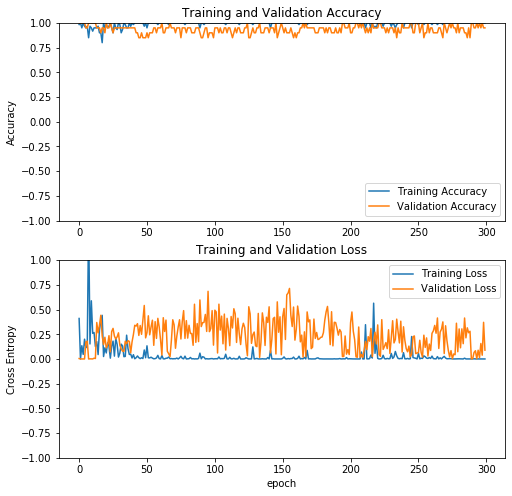

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
scores =model_semi.evaluate(Xtest, Ytest, verbose = 10 )
print(scores)

[0.3500697228968144, 0.8921999931335449]
